<a href="https://colab.research.google.com/github/Rubina-Fathima/Bike-Sharing-ML-Project-12-14-22/blob/main/Individual_collab_bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>
Project Type - Regression

Contribution - Team

Team Member 1 - Racky Kumar

Team Member 2 - Jayesh

Team Member 3 - Mangal lokhande

Team Member 4 - Rubina Fathima



GitHub Link - https://github.com/rackysingh/Bike-Sharing-Demand-Prediction
Problem Description
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
Data Description
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
Attribute Information:

    Date : year-month-day
    Rented Bike count - Count of bikes rented at each hour
    Hour - Hour of he day
    Temperature-Temperature in Celsius
    Humidity - %
    Windspeed - m/s
    Visibility - 10m
    Dew point temperature - Celsius
    Solar radiation - MJ/m2
    Rainfall - mm
    Snowfall - cm
    Seasons - Winter, Spring, Summer, Autumn
    Holiday - Holiday/No holiday
    Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# Loading Dataset and Importing Modules

In [36]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
#To measure each algorithms efficiency we need libraries as below.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')
#load the seol bike data set from drive
bike_df=pd.read_csv('/content/drive/MyDrive/Bike_Sharing_ML_Project/SeoulBikeData.csv',encoding ='latin')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mount the drive and import the datset

In [37]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [38]:
bike_df.shape

(8760, 14)

In [39]:
bike_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [40]:
bike_df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [41]:
bike_df=bike_df.drop(columns='Date',axis=1)
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [42]:
bike_df.isnull()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False


# Checking the Null values

In [43]:
bike_df.isna().any()[lambda x:x ]

Series([], dtype: bool)

In [44]:
bike_df.columns[bike_df.isna().any()].tolist()

[]

In [45]:
bike_df.loc[:,bike_df.isna().any()]

""
0
1
2
3
4
...
8755
8756
8757
8758


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe34cccd00>,
      dtype=object)

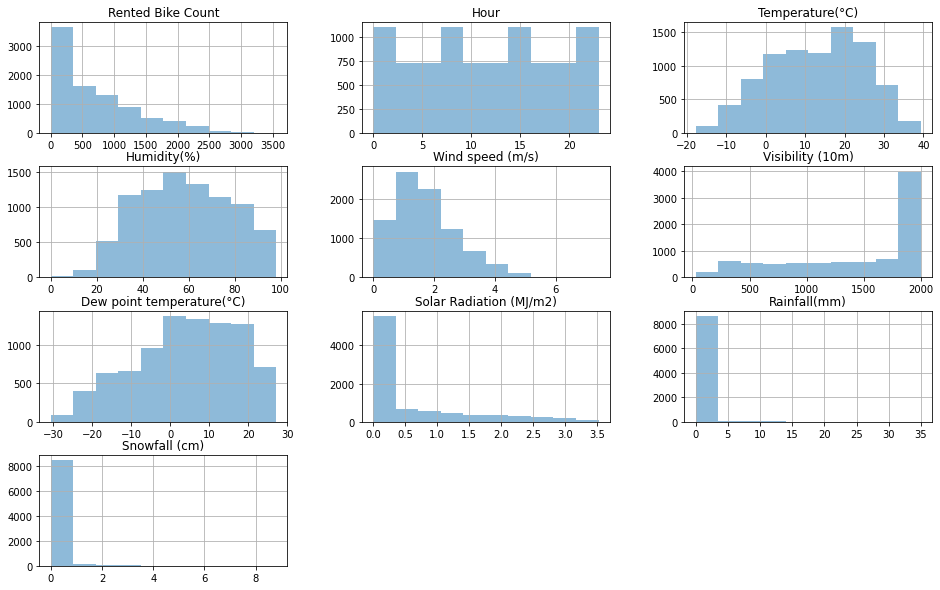

In [46]:
bike_df.hist(alpha=0.5,figsize=(16,10))

In [47]:
#IF the skewness is less that -1 and greater than 1 data is highly skewed apply transformations
bike_df.skew()

Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
dtype: float64

In [48]:
crim_log=np.log(bike_df['Rainfall(mm)'])
crim_log.skew()
crim_snowfall_log=np.log(bike_df['Snowfall (cm)'])
crim_snowfall_log.skew()

nan

In [49]:
bike_df.skew()

Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
dtype: float64

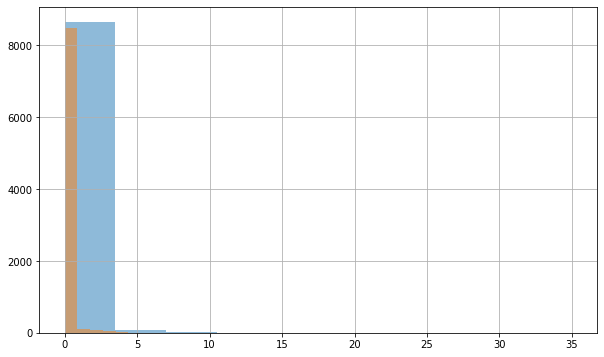

In [50]:
bike_df['Rainfall(mm)'].hist(alpha=0.5, figsize=(10,6))
bike_df['Snowfall (cm)'].hist(alpha=0.5, figsize=(10,6))

In [51]:
crim_sqrt=np.sqrt(bike_df['Rainfall(mm)'])
crim_sqrt.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Rainfall(mm), Length: 8760, dtype: float64>

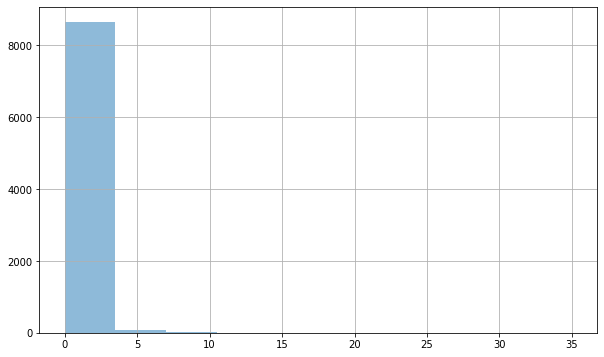

In [52]:
bike_df['Rainfall(mm)'].hist(alpha=0.5, figsize=(10,6))

In [53]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [54]:
#boxcox will not perform because data is negative
from scipy import stats
crim_box_cox=stats.boxcox(bike_df['Rainfall(mm)'])[0]
pd.Series(crim_box_cox).skew()

ValueError: ignored

In [55]:
bike_df['Date']=bike_df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))
bike_df['Date']
bike_df['year']=bike_df['Date'].dt.year
bike_df['month']=bike_df['Date'].dt.month
bike_df['Day']=bike_df['Date'].dt.day_name()
bike_df.head()
bike_df['Day']=bike_df['Day'].apply(lambda x: 1 if x=='saturday' or x=='sunday' else 0)
bike_df=bike_df.drop(columns=['month'],axis=1,inplace=True)
#bike_df=bike_df.drop(columns=['year'],axis=1,inplace=True)
bike_df.head()

KeyError: ignored

In [56]:
#qauntiletransformer is applied to whole dataset where we have only numerical data.Our dataset has date as string format so it cannot be applied here.
from sklearn.preprocessing import QuantileTransformer
quantile=QuantileTransformer(output_distribution='normal')
data_trans=quantile.fit_transform(bike_df)
pyplot.hist(data_trans,bins=25)
pyplot.show()

ValueError: ignored

# Object data types and encoding them.

In [71]:
#code to fetch objet dtype columns
object_columns=bike_df.select_dtypes(include=['object']).copy()
object_columns.head()

""
0
1
2
3
4


In [72]:
bike_df['Seasons'].unique()

array([3, 1, 2, 0], dtype=int8)

In [73]:
cleanup_seasons={'Seasons':{'Winter':1,'Spring':2,'Summer':3,'Autumn':4}}
bike_df.replace(cleanup_seasons)
#checking unique values of holiday column to do encoding
bike_df['Holiday'].unique()
cleanup_holiday={'Holiday':{'No Holiday':1,'Holiday':0}}
bike_df.replace(cleanup_holiday)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1


In [74]:
#checking unique values of holiday column to do encoding
object_columns['Holiday'].unique()
cleanup_holiday={'Holiday':{'No Holiday':1,'Holiday':0}}
bike_df.replace(cleanup_holiday)

KeyError: ignored

# Another way of encoding by cat.codes

In [75]:
bike_df['Holiday']=bike_df['Holiday'].astype('category')
bike_df.head()
bike_df.dtypes
bike_df['Holiday']=bike_df['Holiday'].cat.codes
bike_df.head()
bike_df['Seasons']=bike_df['Seasons'].astype('category')
bike_df['Seasons']=bike_df['Seasons'].cat.codes
bike_df['Functioning Day']=bike_df['Functioning Day'].astype('category')
bike_df['Functioning Day']=bike_df['Functioning Day'].cat.codes
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms. For example, the value of 0 is obviously less than the value of 4 but does that really correspond to the data set in real life? Does a wagon have “4X” more weight in our calculation than the convertible? In this example, I don’t think so.

# Instead of Label encoding we can go with one hot encoding.
This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

In [76]:
#pd.get_dummies(bike_df,columns=['Functioning Day']).head()
X=bike_df.drop(columns='Rented Bike Count',axis=1)
y=np.sqrt(bike_df['Rented Bike Count'])
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [77]:
pd.get_dummies(bike_df,columns=['Functioning Day']).head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day_0,Functioning Day_1
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,0,1


# Applying linear regression here itself

For a successful linear regression following assumptions should be made

1.Linearity of residuals
2.Independance of residulas:no pattern in residuals
3.Normal distribution of residuals
4.Equal variance of residuals: there should be homoscedasticity    
(constant variance in the error terms)
(No)Heteroscedasticity:non constant variance in the error terms.
5.(No)Overfitting: high training accuracy very low test accuracy.
6.Multicollinearity:(no) it is the phenomenon where a model with several independant variables may have some variable dependent ,interrrelated.
7.Feature selection:(good) features necessary for the model should be selected.


In [93]:
pd.get_dummies(bike_df,columns=['Functioning Day']).head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day_0,Functioning Day_1
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,0,1


(6570, 12)
(2190, 12)


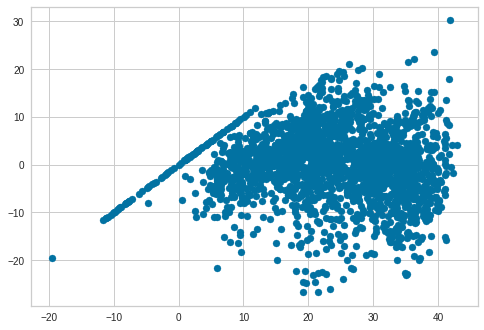

In [94]:
pd.get_dummies(bike_df,columns=['Functioning Day']).head()
X=bike_df.drop(columns='Rented Bike Count',axis=1)
y=np.sqrt(bike_df['Rented Bike Count'])
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
#import the packages

from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train, y_train)
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)
bike_df.head()
plt.scatter(y_pred_test, (y_pred_test - y_test), c='b')


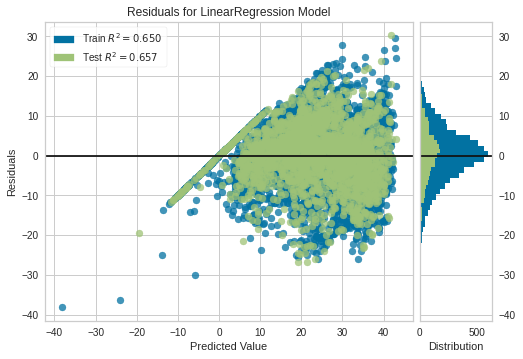

In [95]:

from sklearn.linear_model import LinearRegression

from yellowbrick.regressor import residuals_plot




# Create the visualizer, fit, score, and show it
viz = residuals_plot(LinearRegression(), X_train, y_train, X_test, y_test)

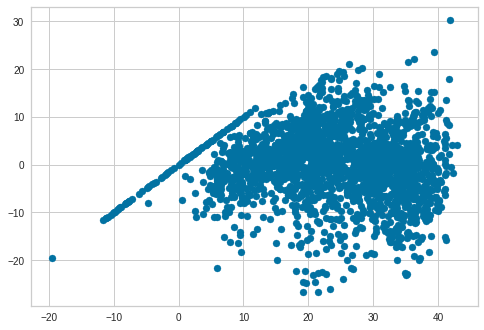

In [96]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)
plt.scatter(y_pred_test, (y_pred_test - y_test), c='b')

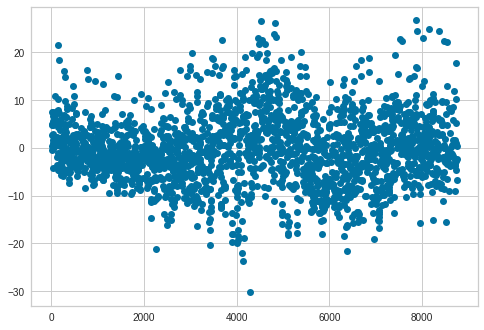

In [97]:
#residuals from linear regression most of the values are around '0' this proves algo is giving best possible outputs.
plt.plot(y_test - y_pred_test,marker='o',linestyle='')

In [98]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X = bike_df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Rented Bike Count,4.236172
1,Hour,5.061977
2,Temperature(°C),43.778009
3,Humidity(%),15.263524
4,Wind speed (m/s),4.848585
5,Visibility (10m),9.140026
6,Dew point temperature(°C),23.144842
7,Solar Radiation (MJ/m2),2.918672
8,Rainfall(mm),1.105388
9,Snowfall (cm),1.128549


columns Temperature,Dew point temperature,Holiday have  vif 43,23,19.


(6570, 9)
(2190, 9)


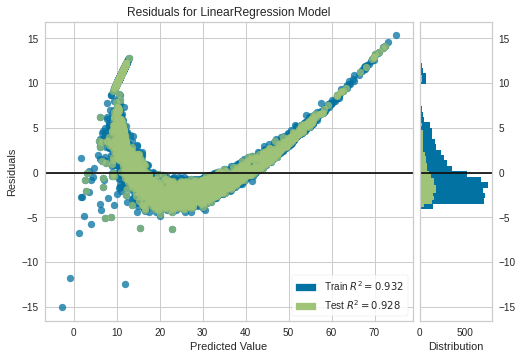

In [99]:
#dropping the columns which are creating multicollinearity
X = bike_df.drop(['Temperature(°C)','Dew point temperature(°C)','Functioning Day','Holiday'],axis=1)
calc_vif(X)
X=bike_df.drop(['Temperature(°C)','Dew point temperature(°C)','Functioning Day','Holiday'],axis=1)
y=np.sqrt(bike_df['Rented Bike Count'])
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
#import the packages

from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train, y_train)
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)
#check the score
reg.score(X_train, y_train)
reg.score(X_test, y_test)
plt.scatter(y_pred_test, (y_pred_test - y_test), c='b')
# Create the visualizer, fit, score, and show it
viz = residuals_plot(LinearRegression(), X_train, y_train, X_test, y_test)


After dropping columns which had vif >10 
Linear regression algorithm 
r2score on train data is 0.650
r2score on test data is  0.657


Graph of residuals and fitted values is "U" shaped.


In [100]:
X = bike_df.iloc[:,:-1]
X

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1


In [101]:
#check the score
reg.score(X_train, y_train)

0.932361742119122

In [102]:


#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)
y_pred_train
y_pred_test
#check the score
reg.score(X_train, y_train)#Return the coefficient of determination of the prediction 0.65 is the score on xtrain and ytrain data of the linear regression
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(solver='lbfgs')
# fit model
#model.fit(X_train,y_train)
# make predictions on the entire training datasetLogistic regression is applied to predict the categorical dependent variable.
#yhat = model.predict(X_train)
# connect predictions with outputs
#for i in range(10):
# print(X_train[i], yhat[i])

0.932361742119122

In [103]:
reg.score(X_test, y_test)

0.9278020439977528

In [104]:

#here im performing the algorithm on train data set and finding the errors in trian data set 
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 10.415661243845348
RMSE : 3.22733035864712
MAE : 2.3949074885248307
R2 : 0.932361742119122
Adjusted R2 : 0.9320825016049349


Now Im perfoming algothims prediction on test dataset.

In [105]:
reg.score(X_test,y_test)

0.9278020439977528

In [106]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

# r2=1-RSS/TSS
#adjusted r2=1-[[(1-R2)(n-1)]/(n-k-1) }   k=number of predictors
#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 11.404851438538568
RMSE : 3.3771069628512755
MAE : 2.4590370807313
R2 : 0.9278020439977528
Adjusted R2 : 0.9275039790417802


For instance, if we want to do the equivalent to label encoding, we need to instantiate a OrdinalEncoder object and fit_transform the data:

In [107]:
#ordinal encoding 
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
ordinal_encoded_df=ordinal_encoder.fit_transform(bike_df[['Seasons']])
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


# binary encoding one hot encoding

In [108]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [109]:
#rom sklearn.preprocessing import OneHotEncoder
#one_hot_encoder=OneHotEncoder()
#oe_results=one_hot_encoder.fit_transform(bike_df[['Functioning Day']])
#bike_df=bike_df.join(pd.DataFrame(oe_results.toarray(),columns=one_hot_encoder.categories_))
#bike_df.head()

here oe_results gives elements in compressed sparse row format.
so use toarray() to convert results into dataframe


In [110]:
#bike_df=bike_df.drop(columns='Date',axis=1,inplace=True)
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


# Checking multicollinearity

In [111]:
#pd.get_dummies(bike_df,columns=['Functioning Day']).head()
cleanup_seasons={'Seasons':{'Winter':1,'Spring':2,'Summer':3,'Autumn':4}}
bike_df.replace(cleanup_seasons)
#checking unique values of holiday column to do encoding
cleanup_holiday={'Holiday':{'No Holiday':1,'Holiday':0}}
bike_df.replace(cleanup_holiday)
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [112]:
#Assign all catagoriacla features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index([], dtype='object')

In [114]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()      
#drop the Dew point temperature column


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [116]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

KeyError: ignored

In [117]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 12)
(2190, 12)


In [118]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()       

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [119]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.9249794147915636 0.9297851049445511


In [120]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [121]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 10.812439351375758
RMSE : 3.2882273874195134
MAE : 2.4698090298993036
R2 : 0.9297851049445511
Adjusted R2 : 0.9293980683158578


In [123]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [124]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [125]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 11.850732022216935
RMSE : 3.4424892188962533
MAE : 2.532413367718359
R2 : 0.9249794147915636
Adjusted R2 : 0.9245658883687335


In [126]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 11.404851438538568
RMSE : 3.3771069628512755
MAE : 2.4590370807313
R2 : 0.9278020439977528
Adjusted R2 : 0.9274040763946169


In [127]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

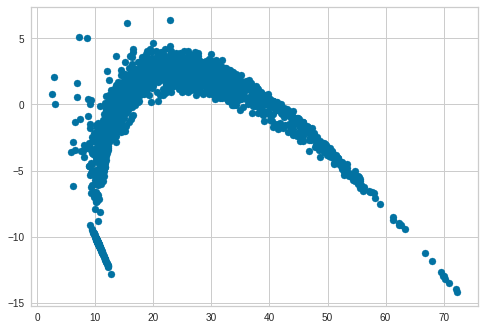

In [128]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

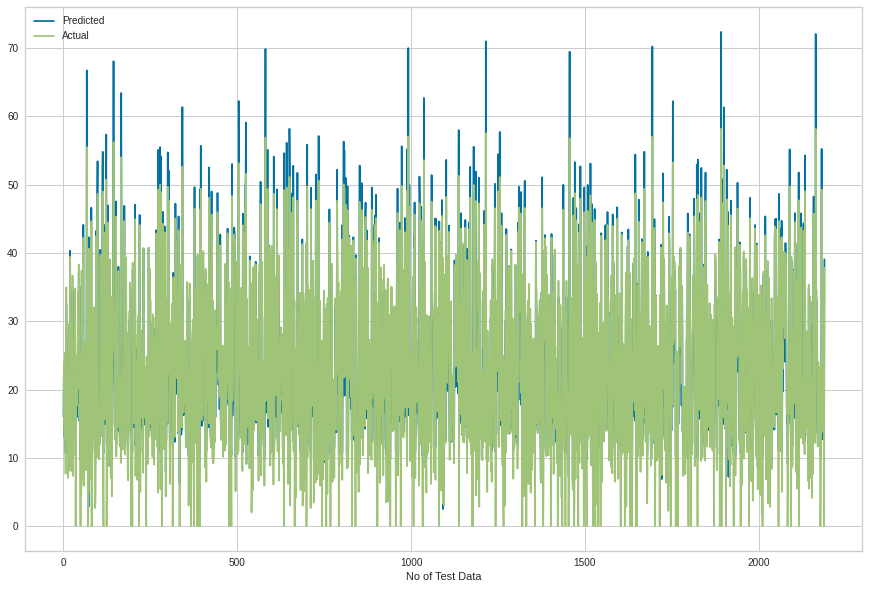

In [129]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [130]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.9249794147915636 0.9297851049445511


In [131]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [132]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)
#FIT THE MODEL
ridge.fit(X_train,y_train)
#check the score
ridge.score(X_train, y_train)
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 10.202140196632502
RMSE : 3.1940789277399677
MAE : 2.3291014883946883
R2 : 0.9337483263518717
Adjusted R2 : 0.9333831356840823
MSE : 11.364615076488931
RMSE : 3.3711444757661946
MAE : 2.4101236090760616
R2 : 0.9280567586788344
Adjusted R2 : 0.9276601951070136


In [133]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

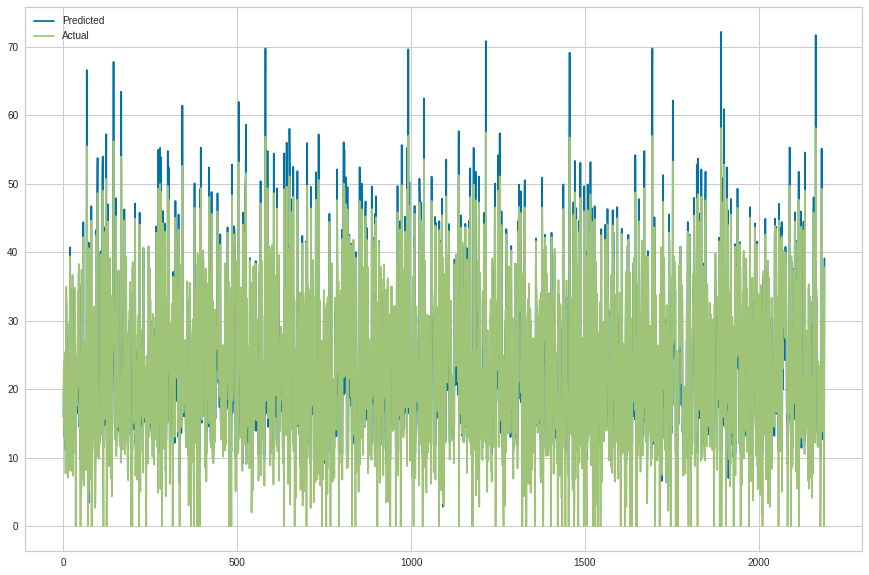

In [134]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

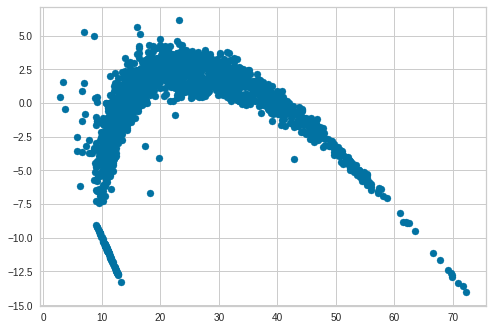

In [135]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))